# Séance 4 : Intégrales multiples

## &Eacute;chauffement : intégrale simple, la spirale de Cornu

La spirale de Cornu est une courbe du plan, définie de manière paramétrique par 
\begin{align}
x(t) & = \int_0^t \cos(u^2)\, \textrm{d}u, \\
y(t) & = \int_0^t \sin(u^2)\, \textrm{d}u.
\end{align}
Pour calculer les intégrales, on va utiliser `quad` de la librairie `scipy.integrate`.

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.integrate import quad, dblquad, nquad
from math import sqrt, sin, cos

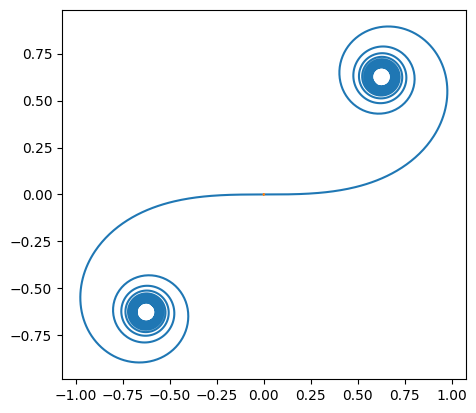

In [10]:
def funx(t):
    return quad(lambda x: cos(x**2), 0, t)

def funy(t):
    return quad(lambda x: sin(x**2), 0, t)

t = np.arange(-10,10,.01)
x = [funx(ti) for ti in t]
y = [funy(ti) for ti in t]
plt.plot(x, y)
plt.axis('scaled');

## Calcul de surface

On considère la courbe plane $\mathcal{C}$ d'équation 
\begin{equation*}
x^3 + x^2 - y^2 = 0.
\end{equation*}
Le but est de calculer la surface $\mathcal{S}$ délimitée par la boucle de cette courbe.

On peut déterminer $y$ en fonction de $x$:
\begin{equation*}
y = \pm x\sqrt{1+x}.
\end{equation*}
Les points d'intersection avec l'axe des abscisses sont les points $(-1,0)$ et $(0,0)$.

In [3]:
def demiC(x):
    return x * np.sqrt(1+x)

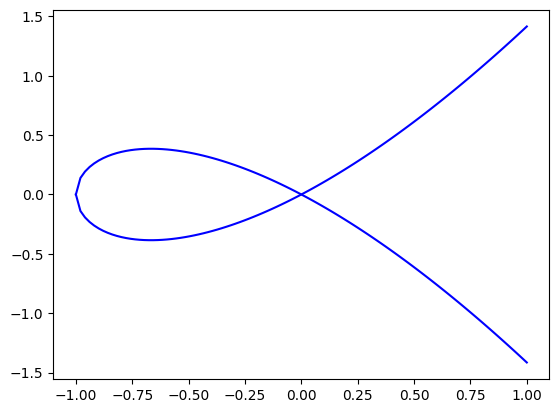

In [11]:
x = np.linspace(-1,1,100)
y = demiC(x)
plt.plot(x, y, 'b')
plt.plot(x, -y, 'b');

On peut décrire la surface comme un domaine vertical (attention à l'ordre des bornes, car $x$ est négatif) :
\begin{equation*}
\mathcal{S} = \{(x,y)\in\mathbb{R}^2,\ -1 \leq x \leq 0,\ x\sqrt{1+x} \leq y \leq -x\sqrt{1+x}\}.
\end{equation*}
Pour en calculer la surface, on va utiliser `dblquad` de la librairie `scipy.integrate`

In [5]:
xmin, xmax = -1, 0
dblquad(lambda y, x: 1, xmin, xmax, 
        lambda x: x*sqrt(1+x), 
        lambda x: -x*sqrt(1+x))

(0.5333333333333331, 4.988618407253398e-10)

<font color='red'>Attention à la logique de `dblquad` ! Quand on intègre sur un domaine vertical, on intègre d'abord en $y$ entre les deux bornes $\alpha(x)$ et $\beta(x)$, puis en $x$. C'est la raison pour laquelle on déclare $y$ puis $x$ dans les variables de la fonction à intégrer. </font>

## Changement de variable

Soit $a>0$ et le domaine
\begin{equation}
\mathcal{D}_2 = \{ (x,y)\in \mathbb{R}_+^2,\ x+y\leq4a,\ xy \geq a^2,\ x \geq y\}.
\end{equation}

### Description du domaine

Traçons ce domaine pour $a=2$. La condition $x+y\leq4a$ décrit le demi-plan sous la droite bleue. La condition $xy \geq a^2$ décrit la partie du plan au dessus de l'hyperbole tracée en rouge. Enfin la condition $x \geq y$ décrit le demi-plan sous la droite verte. Le domaine $\mathcal{D}$ est l'intersection de ces trois domaines.

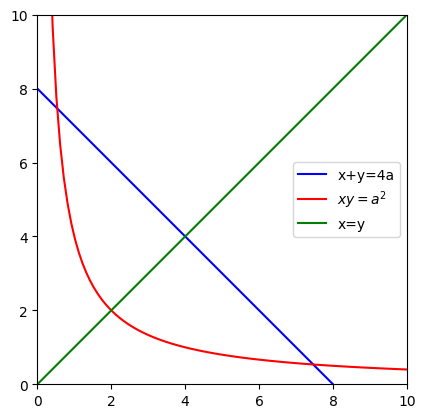

In [6]:
a = 2

x = np.linspace(.01, 1.25*(4*a), 100)
cond1 = 4 * a - x
cond2 = a*a / x
cond3 = x

fig, ax = plt.subplots() 
ax.plot(x, cond1, 'b', label='x+y=4a')
ax.plot(x, cond2, 'r', label='$xy=a^2$')
ax.plot(x, cond3, 'g', 
        label='x=y')
ax.set_aspect('equal', 'box')
ax.set(xlim=(0, 1.25 * 4 * a), ylim=(0, 1.25 * 4 * a))
ax.legend();

Les coordonnées des points d'intersection des courbes sont les suivantes :
* $x+y=4a$ et $x=y$ : $(2a,2a)$.
* $xy=a^2$ et $x=y$ : $(a,a)$.
* $x+y=4a$ et $xy=a^2$ : là c'est plus compliqué. On pose $y=a^2/x$, ce qui en injectant dans l'autre équation donne l'équation du second degré $x^2-4ax+a^2=0$ et donc le point $((2+\sqrt3)a, (2-\sqrt3)a)$.

### Changement de variable

On pourait calculer sur le domaine vertical 
\begin{equation*}
\mathcal{D}_2 = \left\{(x,y)\in\mathbb{R}^2,\ a \leq x \leq (2+\sqrt3)a,\ \frac{a^2}x \leq y \leq \min(x,4a-x)\right\}.
\end{equation*}
Mais en exploitant l'angle droit du domaine, on peut proposer de poser
\begin{align}
x & = u+v, \\
y & = u-v.
\end{align}
On a alors 
\begin{align}
u & = \frac12(x+y), \\
v & = \frac12(x-y).
\end{align}
Dans ces nouvelles variables, on "voit" sur la courbe que $x+y$ reste compris entre $2a$ et $4a$, et donc $a \leq u \leq 2a$. Par ailleurs la condition $x \geq y$ se réécrit $v\geq0$ et $xy \geq a^2$ donne $u^2-v^2\geq a^2$ et donc $v\leq \sqrt{u^2-a^2}$. Le domaine se réécrit donc 
\begin{equation*}
\mathcal{D}_1 = \left\{(u,v)\in\mathbb{R}^2,\ a \leq u \leq 2a,\ 0 \leq v \leq \sqrt{u^2-a^2}\right\}.
\end{equation*}
On peut donc définir une bijection $\varphi$ de $\mathcal{D}_1$ dans $\mathcal{D}_2$, qui à $(u,v)$ associe $(x,y)$.
La jacobienne associée à ce changement de variable est 
\begin{equation*}
\mathcal{J}(\varphi)(u,v) = \begin{pmatrix} 1 & 1 \\ 1 & -1\end{pmatrix},
\end{equation*}
dont le déterminant est $-2$.

Pour calculer l'intégrale d'une fonction $f(x,y)$ sur $\mathcal{D}_2$, on a la formule   
\begin{equation*}
\int_{\mathcal{D}_2} f(x,y)\, \mathrm{d}x\mathrm{d}y 
= \int_{\mathcal{D}_1} f(u,v)\, |\det(\mathcal{J}(\varphi)(u,v))|\, \mathrm{d}u\mathrm{d}v. 
\end{equation*}

In [7]:
def Ixy(g, a):
    xmin, xmax = a, (2+sqrt(3))*a
    ymin = lambda x: a*a/x
    ymax = lambda x: min(x, 4*a - x)
    return dblquad(g, xmin, xmax, ymin, ymax)

In [8]:
def Iuv(f, a):
    umin, umax = a, 2*a
    vmin = lambda u: 0
    vmax = lambda u: sqrt(u**2 - a**2)
    return dblquad(f, umin, umax, vmin, vmax)

### Application à $f_1$

Dans notre changement de variable, on a $x^2-y^2 = 4uv$ et $xy=u^2-v^2$.

Appliquons ceci à la fonction $f_1(x,y) = (x^2-y^2)xy$.
\begin{equation*}
\int_{\mathcal{D}_2} (x^2-y^2)xy\, \mathrm{d}x\mathrm{d}y 
= \int_{\mathcal{D}_1} 4 uv\, (u^2-v^2)\, 2\, \mathrm{d}u\mathrm{d}v 
= 8 \int_{\mathcal{D}_1} uv\, (u^2-v^2)\,\mathrm{d}u\mathrm{d}v. 
\end{equation*}

In [9]:
f1 = lambda  : (x**2 - y**2) * x * y

print(Ixy(f1, 1)[0], Ixy(f1, 2)[0], Ixy(f1, 3)[0])

TypeError: <lambda>() takes 0 positional arguments but 2 were given

D'un point de vue théorique, on a 
\begin{align*}
I_1 & = 8 \int_a^{2a} u \left(\int_0^{\sqrt{u^2-a^2}} v (u^2-v^2)\, \mathrm{d}v\right) \mathrm{d}u
= 8 \int_a^{2a} u \left[ \frac12 v^2 u^2 - \frac14 v^4 \right]_0^{\sqrt{u^2-a^2}} \mathrm{d}u \\
& = 8 \int_a^{2a} u \left[ \frac12 (u^2-a^2) u^2 - \frac14 (u^2-a^2)^2 \right] \mathrm{d}u 
= 2 \int_a^{2a} u (u^4 - a^4)\, \mathrm{d}u \\
& = \left[\frac{u^6}3 - a^4 u^2\right]_a^{2a}
= \frac13 (64a^6-a^6) - a^4 (4a^2-a^2) = 21 a^6 - 3 a^6 = 18 a^6.
\end{align*}

In [ ]:
def I1(a):
    return 18 * a**6

print(I1(1), I1(2), I1(3))

18 1152 13122


### Application à $f_2$

Appliquons ceci à la fonction $f_2(x,y) = (x^2-y^2)\cos(xy)$.
\begin{equation*}
\int_{\mathcal{D}_2} (x^2-y^2)xy\, \mathrm{d}x\mathrm{d}y 
= 2 \int_{\mathcal{D}_1} 4 uv \cos(u^2-v^2)\, \mathrm{d}u\mathrm{d}v. 
\end{equation*}

In [ ]:
f2 = lambda y, x: (x**2 - y**2) * cos(x * y)

print(Ixy(f2, 1)[0], Ixy(f2, 2)[0], Ixy(f2, 3)[0])

-2.660934055303377 18.77129160553505 -23.82073134573169


D'un point de vue théorique, on a 
\begin{equation*}
I_2 = 8 \int_a^{2a} u \left(\int_0^{\sqrt{u^2-a^2}} v \cos(u^2-v^2)\, \mathrm{d}v\right) \mathrm{d}u. 
\end{equation*}
Pour calculer l'intégrale en $v$, on pose $t=u^2-v^2$ et donc $\mathrm{d}t=-2v\, \mathrm{d}v$, d'où
\begin{align*}
\int_0^{\sqrt{u^2-a^2}} v \cos(u^2-v^2)\, \mathrm{d}v
& = -\frac12 \int_{u^2}^{a^2} \cos(t)\, \mathrm{d}t
= \frac12 \int_{a^2}^{u^2} \cos(t)\, \mathrm{d}t \\
& = \frac12 (\sin(u^2)-\sin(a^2)).
\end{align*}
On a donc 
\begin{align*}
I_2 & = 4 \int_a^{2a} u (\sin(u^2)-\sin(a^2))\, \mathrm{d}u
= 4 \int_a^{2a} u \sin(u^2)\, \mathrm{d}u - 2 \sin(a^2) \left[u^2\right]_a^{2a} \\
& = 4 \int_a^{2a} u \sin(u^2)\, \mathrm{d}u - 6 a^2 \sin(a^2). 
\end{align*}
Pour cette dernière intégrale, on pose $s=u^2$ et donc $\mathrm{d}s=2u\, \mathrm{d}u$, d'où
\begin{equation*}
\int_a^{2a} u \sin(u^2)\, \mathrm{d}u
= \frac12 \int_{a^2}^{4a^2} \sin(s)\, \mathrm{d}s
= -\frac12 (\cos(4a^2)-\cos(a^2)). 
\end{equation*}
On a donc finalement
\begin{equation*}
I_2 = 2 \cos(a^2) - 2 \cos(4a^2) - 6 a^2 \sin(a^2).
\end{equation*}

In [ ]:
def I2(a):
    return 2 * cos(a*a) - 2 * cos(4*a*a) - 6 * a*a * sin(a*a)

print(I2(1), I2(2), I2(3))

-2.6609340553838754 18.77129160630982 -23.8207313475694


In [ ]:
### Comparaison des méthodes
g1 = lambda v, u: 8 * u * v * (u**2 - v**2)
g2 = lambda v, u: 8 * u * v * cos(u**2 - v**2)

print(f"Calcul de l'intégrale de f1 pour a = 1, 2 et 3")
print(f"Valeurs exactes : {I1(1)}, {I1(2)} et {I1(3)}")
print(f"Intégrale en xy : {Ixy(f1, 1)[0]}, {Ixy(f1, 2)[0]} et {Ixy(f1, 3)[0]}")
print(f"Intégrale en uv : {Iuv(g1, 1)[0]}, {Iuv(g1, 2)[0]} et {Iuv(g1, 3)[0]}\n")

print(f"Calcul de l'intégrale de f2 pour a = 1, 2 et 3")
print(f"Valeurs exactes : {I2(1)}, {I2(2)} et {I2(3)}")
print(f"Intégrale en xy : {Ixy(f2, 1)[0]}, {Ixy(f2, 2)[0]} et {Ixy(f2, 3)[0]}")
print(f"Intégrale en uv : {Iuv(g2, 1)[0]}, {Iuv(g2, 2)[0]} et {Iuv(g2, 3)[0]}")

Calcul de l'intégrale de f1 pour a = 1, 2 et 3
Valeurs exactes : 18, 1152 et 13122
Intégrale en xy : 17.999999999457405, 1151.999999965274 et 13121.999999604453
Intégrale en uv : 18.0, 1152.0 et 13121.999999999996

Calcul de l'intégrale de f2 pour a = 1, 2 et 3
Valeurs exactes : -2.6609340553838754, 18.77129160630982 et -23.8207313475694
Intégrale en xy : -2.660934055303377, 18.77129160553505 et -23.82073134573169
Intégrale en uv : -2.660934055383876, 18.77129160630981 et -23.820731347569392
